In [1]:
import h5py
import numpy as np
import os,random
from tensorflow.keras.layers import Input,Reshape,ZeroPadding2D,Conv2D,Dropout,Flatten,Dense,Activation,MaxPooling2D,AlphaDropout
from tensorflow.keras import layers
import tensorflow.keras.models as Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa


In [2]:
f = h5py.File(r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part0.h5')
sample_num = f['X'].shape[0]
idx = np.random.choice(range(0,sample_num),size=60000)
# idx = np.random.choice(range(0,sample_num),size=30000)
X = f['X'][:][idx]
Y = f['Y'][:][idx]
Z = f['Z'][:][idx]
f.close()

for i in range(1,24):
    if i%1 == 0:
        !free -m
    '''if i == 10:
        continue'''
    filename = r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part'+str(i) + '.h5'
    print(filename)
    f = h5py.File(filename,'r')
    X = np.vstack((X,f['X'][:][idx]))
    Y = np.vstack((Y,f['Y'][:][idx]))
    Z = np.vstack((Z,f['Z'][:][idx]))
    f.close()


print('X-size：',X.shape)
print('Y-size：',Y.shape)
print('Z-size：',Z.shape)

C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part1.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part2.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part3.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part4.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part5.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part6.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part7.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part8.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part9.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part10.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part11.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part12.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part13.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part14.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part15.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part16.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part17.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part18.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part19.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part20.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part21.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part22.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part23.h5
X-size： (1440000, 1024, 2)
Y-size： (1440000, 24)
Z-size： (1440000, 1)


## Data preprocessing, and obtain training set and test set

In [3]:
n_examples = X.shape[0]
n_train = int(n_examples * 0.8)   
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)  #Randomly select training sample subscript
test_idx = list(set(range(0,n_examples))-set(train_idx)) #Test sample index
X_train = X[train_idx]  #training samples
X_test =  X[test_idx]  #testing samples
Y_train = Y[train_idx]
Y_test = Y[test_idx]
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train: (1152000, 1024, 2)
Y_train: (1152000, 24)
X_test: (288000, 1024, 2)
Y_test: (288000, 24)


In [4]:
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '16QAM']

opt = tfa.optimizers.NovoGrad(
    lr=1e-3,
    beta_1=0.9,
    beta_2=0.999,
    weight_decay=0.001,
    grad_averaging=False
)

def residual_stack(X,Filters,Seq,max_pool):
    #1*1 Conv Linear
    X = Conv2D(Filters, (1, 1), padding='same', name=Seq+"_conv1", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    #Residual Unit 1
    X_shortcut = X
    X = Conv2D(Filters, (3, 2), padding='same',activation="relu",name=Seq+"_conv2", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = Conv2D(Filters, (3, 2), padding='same', name=Seq+"_conv3", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = layers.add([X,X_shortcut])
    X = Activation("relu")(X)
    #Residual Unit 2
    X_shortcut = X
    X = Conv2D(Filters, (3, 2), padding='same',activation="relu",name=Seq+"_conv4", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = Conv2D(Filters, (3, 2), padding='same', name=Seq+"_conv5", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = layers.add([X,X_shortcut])
    X = Activation("relu")(X)
    #MaxPooling
    if max_pool:
        X = MaxPooling2D(pool_size=(2, 1), strides=(2, 1), padding='valid', data_format="channels_first")(X)
    return X


in_shp = X_train.shape[1:]   #Dimensions of each sample
#input layer
X_input = Input(in_shp)
X = Reshape([1,1024,2], input_shape=in_shp)(X_input)
#Residual Srack 1
X = residual_stack(X,32,"ReStk1",False)  #shape:(1,512,32)
X = MaxPooling2D(pool_size=(2, 2), strides=(2, 1), padding='valid', data_format="channels_first")(X)
#Residual Srack 2
X = residual_stack(X,32,"ReStk2",True)  #shape:(1,256,32)
#Residual Srack 3
X = residual_stack(X,32,"ReStk3",True)  #shape:(1,128,32)
#Residual Srack 4
X = residual_stack(X,32,"ReStk4",True)  #shape:(1,64,32)
#Residual Srack 5
X = residual_stack(X,32,"ReStk5",True)  #shape:(1,32,32)
#Residual Srack 6
X = residual_stack(X,32,"ReStk6",True)  #shape:(1,16,32)
#Full Con 1
X = Flatten()(X)
X = Dense(128, activation='selu', kernel_initializer='he_normal', name="dense1")(X)
X = AlphaDropout(0.3)(X)
#Full Con 2
X = Dense(128, activation='selu', kernel_initializer='he_normal', name="dense2")(X)
X = AlphaDropout(0.3)(X)
#Full Con 3
X = Dense(len(classes), kernel_initializer='he_normal', name="dense3")(X)
#SoftMax
X = Activation('softmax')(X)
#Create Model
model = Model.Model(inputs=X_input,outputs=X)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 2)]    0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 1, 1024, 2)   0           input_1[0][0]                    
__________________________________________________________________________________________________
ReStk1_conv1 (Conv2D)           (None, 32, 1024, 2)  64          reshape[0][0]                    
__________________________________________________________________________________________________
ReStk1_conv2 (Conv2D)           (None, 32, 1024, 2)  6176        ReStk1_conv1[0][0]               
_______________________________________________________________________________________

In [5]:
# perform training ...
#   - call the main training loop in keras for our network+dataset
print(tf.test.gpu_device_name())

/device:GPU:0


In [6]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0","/gpu:1","/gpu:2"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2')


In [14]:

filepath = 'resnet_model.h5'
model = load_model(filepath)
history = model.fit(X_train,
    Y_train,
    batch_size=1024,
    epochs=100,
    verbose=1,
#     validation_data=(X_test, Y_test),
    validation_split = 0.2,
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/100
900/900 [==============================] - ETA: 0s - loss: 2.8556 - accuracy: 0.1291WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0040s vs `on_test_batch_end` time: 0.0858s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 2.20355, saving model to resnet_model.h5
900/900 [==============================] - 303s 337ms/step - loss: 2.8556 - accuracy: 0.1291 - val_loss: 2.2035 - val_accuracy: 0.2429
Epoch 2/100
900/900 [==============================] - ETA: 0s - loss: 2.2175 - accuracy: 0.2287
Epoch 00002: val_loss improved from 2.20355 to 2.04955, saving model to resnet_model.h5
900/900 [==============================] - 305s 339ms/step - loss: 2.2175 - accuracy: 0.2287 - val_loss: 2.0495 - val_accuracy: 0.2902
Epoch 3/100
900/900 [==============================] - ETA: 0s - loss: 2.0687 - accuracy: 0.2667
Epoch 00003: val_loss improved from 2.04955 to 1.98367, saving model to resnet_model.h5
900/90

Epoch 27/100
900/900 [==============================] - ETA: 0s - loss: 1.7396 - accuracy: 0.3923
Epoch 00027: val_loss improved from 1.76260 to 1.74184, saving model to resnet_model.h5
900/900 [==============================] - 302s 336ms/step - loss: 1.7396 - accuracy: 0.3923 - val_loss: 1.7418 - val_accuracy: 0.4068
Epoch 28/100
900/900 [==============================] - ETA: 0s - loss: 1.7341 - accuracy: 0.3934
Epoch 00028: val_loss did not improve from 1.74184
900/900 [==============================] - 302s 335ms/step - loss: 1.7341 - accuracy: 0.3934 - val_loss: 1.7707 - val_accuracy: 0.3944
Epoch 29/100
900/900 [==============================] - ETA: 0s - loss: 1.7615 - accuracy: 0.3879
Epoch 00029: val_loss improved from 1.74184 to 1.73132, saving model to resnet_model.h5
900/900 [==============================] - 304s 338ms/step - loss: 1.7615 - accuracy: 0.3879 - val_loss: 1.7313 - val_accuracy: 0.4098
Epoch 30/100
900/900 [==============================] - ETA: 0s - loss: 1.

Epoch 55/100
900/900 [==============================] - ETA: 0s - loss: 1.6391 - accuracy: 0.4267
Epoch 00055: val_loss did not improve from 1.65513
900/900 [==============================] - 302s 335ms/step - loss: 1.6391 - accuracy: 0.4267 - val_loss: 1.6733 - val_accuracy: 0.4341
Epoch 56/100
900/900 [==============================] - ETA: 0s - loss: 1.6500 - accuracy: 0.4246
Epoch 00056: val_loss did not improve from 1.65513
900/900 [==============================] - 303s 336ms/step - loss: 1.6500 - accuracy: 0.4246 - val_loss: 1.6685 - val_accuracy: 0.4391
Epoch 57/100
900/900 [==============================] - ETA: 0s - loss: 1.6310 - accuracy: 0.4306
Epoch 00057: val_loss did not improve from 1.65513
900/900 [==============================] - 301s 334ms/step - loss: 1.6310 - accuracy: 0.4306 - val_loss: 1.6652 - val_accuracy: 0.4370
Epoch 58/100
900/900 [==============================] - ETA: 0s - loss: 1.6297 - accuracy: 0.4308
Epoch 00058: val_loss did not improve from 1.65513

Epoch 83/100
900/900 [==============================] - ETA: 0s - loss: 1.5215 - accuracy: 0.4752
Epoch 00083: val_loss did not improve from 1.55921
900/900 [==============================] - 301s 335ms/step - loss: 1.5215 - accuracy: 0.4752 - val_loss: 1.6542 - val_accuracy: 0.4766
Epoch 84/100
900/900 [==============================] - ETA: 0s - loss: 1.5192 - accuracy: 0.4767
Epoch 00084: val_loss did not improve from 1.55921
900/900 [==============================] - 301s 334ms/step - loss: 1.5192 - accuracy: 0.4767 - val_loss: 1.5642 - val_accuracy: 0.4845
Epoch 85/100
900/900 [==============================] - ETA: 0s - loss: 1.5176 - accuracy: 0.4769
Epoch 00085: val_loss improved from 1.55921 to 1.53678, saving model to resnet_model.h5
900/900 [==============================] - 303s 336ms/step - loss: 1.5176 - accuracy: 0.4769 - val_loss: 1.5368 - val_accuracy: 0.4930
Epoch 86/100
900/900 [==============================] - ETA: 0s - loss: 1.5118 - accuracy: 0.4793
Epoch 00086: 

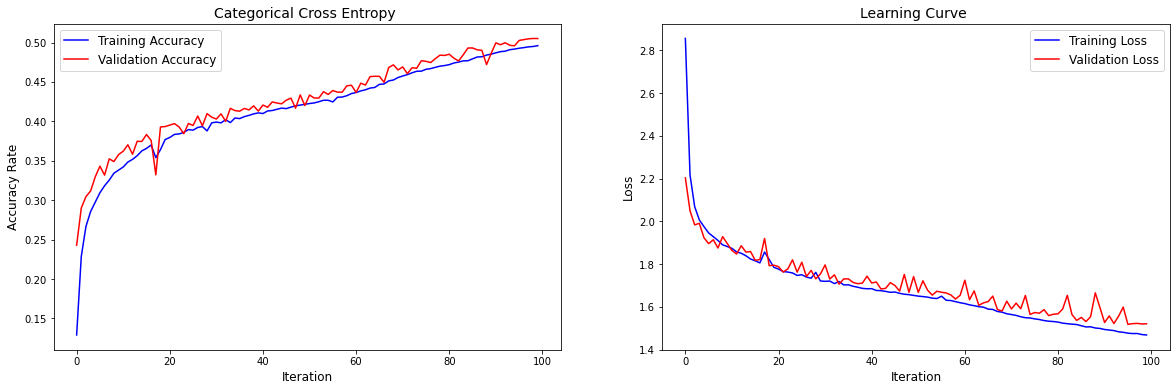

In [15]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Categorical Cross Entropy ',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve ',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

In [16]:
model = load_model(filepath)

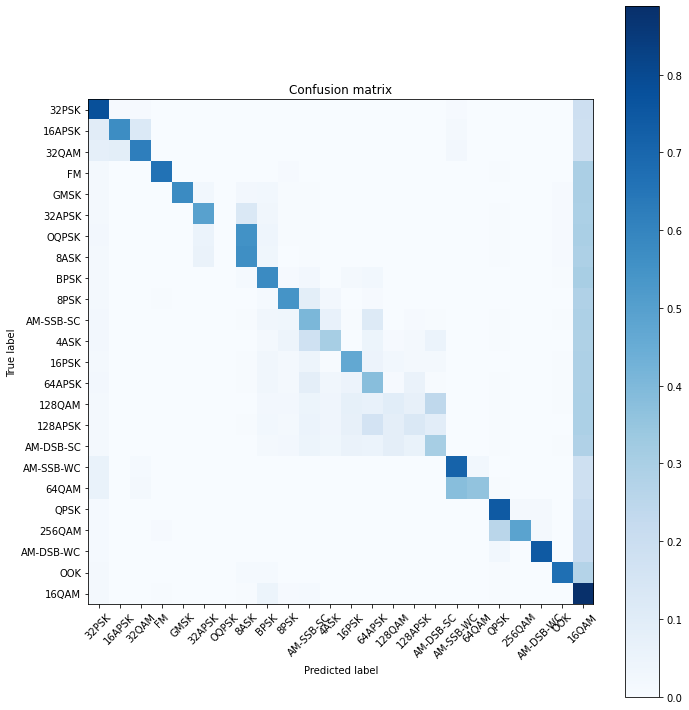

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [18]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.7800885325315293
16APSK 0.5716999834792664
32QAM 0.6175538127815785
FM 0.660458929165281
GMSK 0.5774180157741802
32APSK 0.49506688963210704
OQPSK 0.0014354470995524783
8ASK 0.5634661987131278
BPSK 0.5783850931677018
8PSK 0.5452459016393443
AM-SSB-SC 0.4085500943628457
4ASK 0.30588333056340367
16PSK 0.46652754590984974
64APSK 0.3813488759367194
128QAM 0.09390884092992251
128APSK 0.12683622932930413
AM-DSB-SC 0.30634065478657274
AM-SSB-WC 0.712662880053458
64QAM 0.3573360378634212
QPSK 0.7433620906273557
256QAM 0.48646186966961996
AM-DSB-WC 0.743945214631702
OOK 0.6720416561686403
16QAM 0.8878920006708033


In [19]:
Z_test

NameError: name 'Z_test' is not defined

Overall Accuracy -20:  0.041902198295199644
Overall Accuracy -18:  0.046978629329403096
Overall Accuracy -16:  0.04684905165632375
Overall Accuracy -14:  0.04680813124108416
Overall Accuracy -12:  0.05346570725931323
Overall Accuracy -10:  0.07641257258733523
Overall Accuracy -8:  0.12690401908607085
Overall Accuracy -6:  0.18844566712517194
Overall Accuracy -4:  0.27606109039247023
Overall Accuracy -2:  0.38075163691810926


C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Overall Accuracy 0:  0.46553059643687067
Overall Accuracy 2:  0.5693741677762982
Overall Accuracy 4:  0.6546708931568153
Overall Accuracy 6:  0.712657413365199
Overall Accuracy 8:  0.750912489984866
Overall Accuracy 10:  0.7752352832625946
Overall Accuracy 12:  0.7910608508346796
Overall Accuracy 14:  0.7847043701799485
Overall Accuracy 16:  0.7880255941499086
Overall Accuracy 18:  0.786138794916339
Overall Accuracy 20:  0.7902066885478577
Overall Accuracy 22:  0.7854328985380373
Overall Accuracy 24:  0.7882039911308204
Overall Accuracy 26:  0.7906382228490832
Overall Accuracy 28:  0.798472553699284
Overall Accuracy 30:  0.7872089863212247


<Figure size 432x288 with 0 Axes>

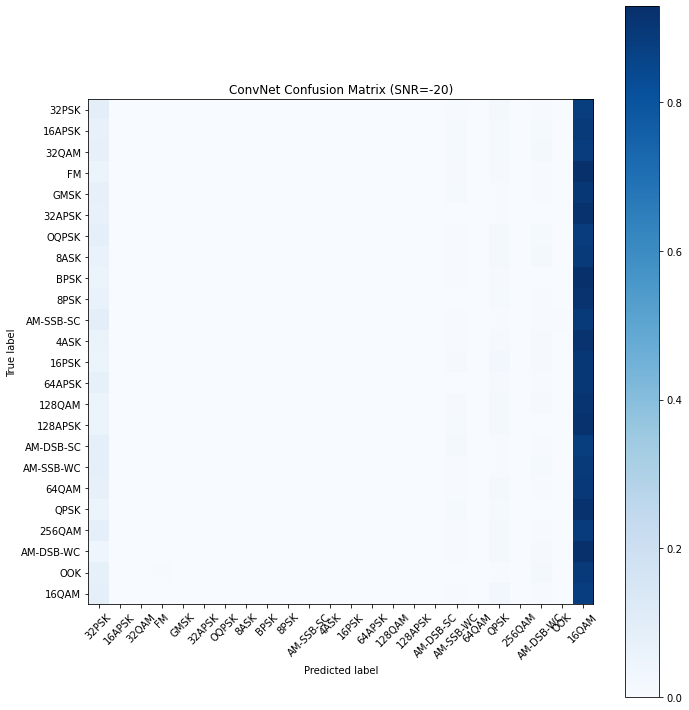

<Figure size 432x288 with 0 Axes>

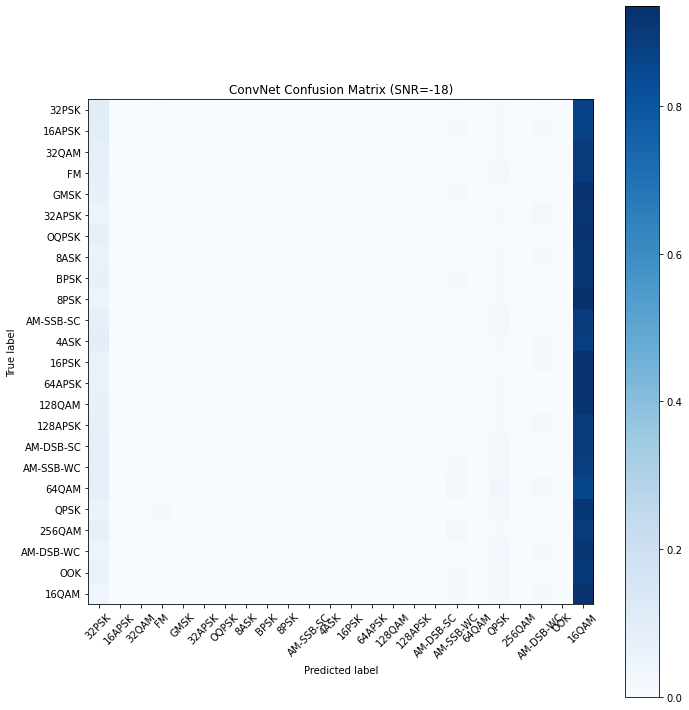

<Figure size 432x288 with 0 Axes>

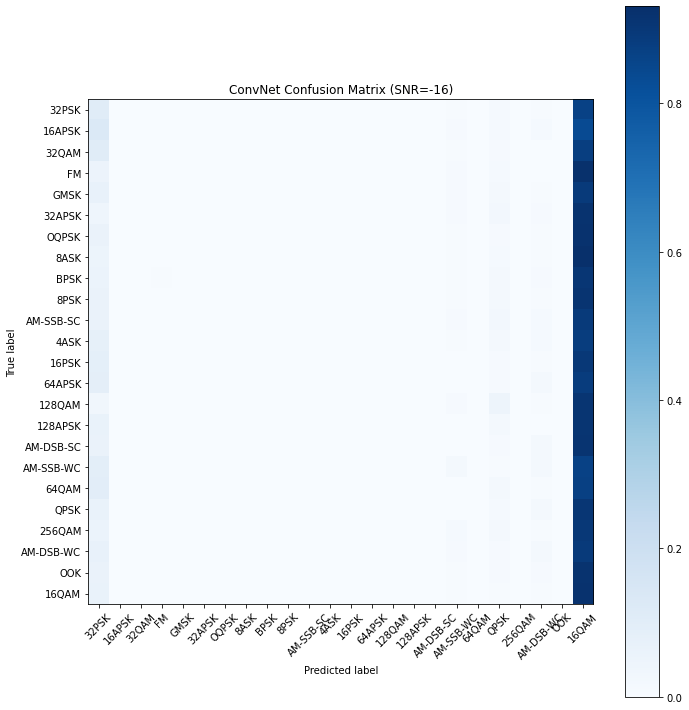

<Figure size 432x288 with 0 Axes>

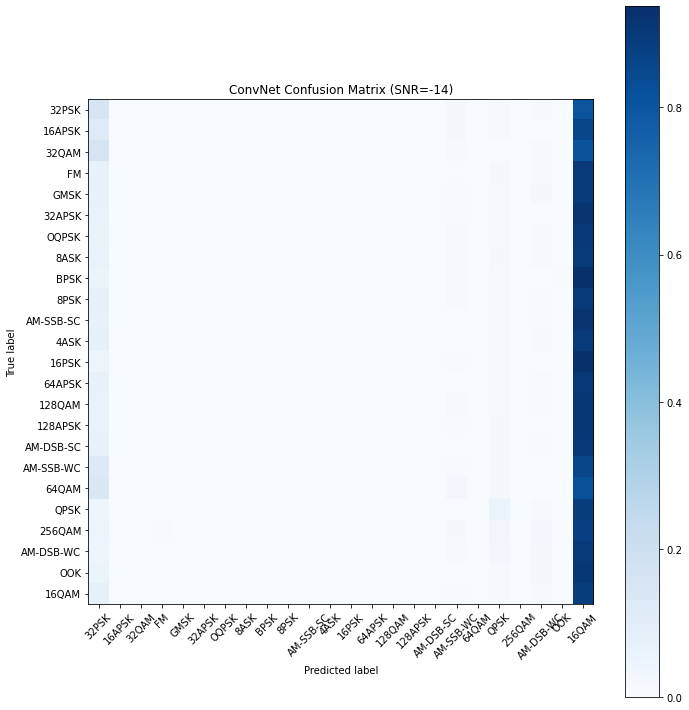

<Figure size 432x288 with 0 Axes>

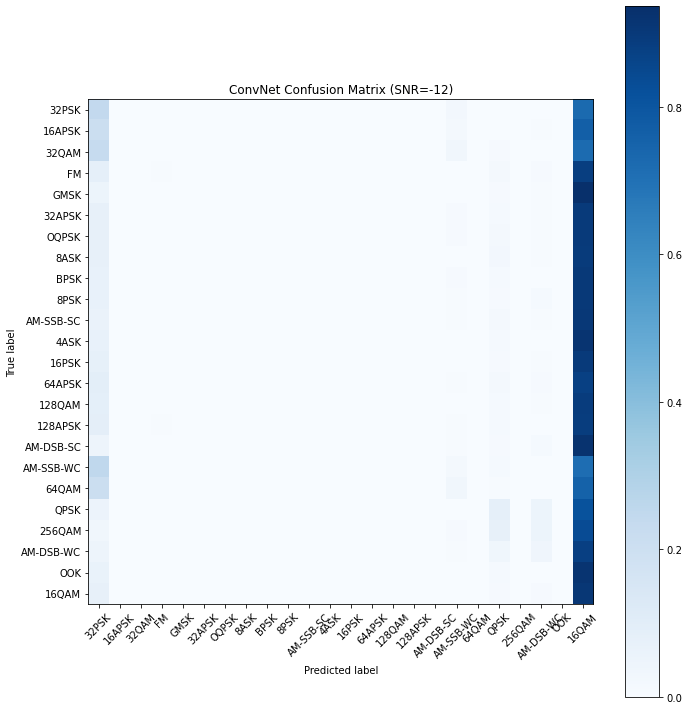

<Figure size 432x288 with 0 Axes>

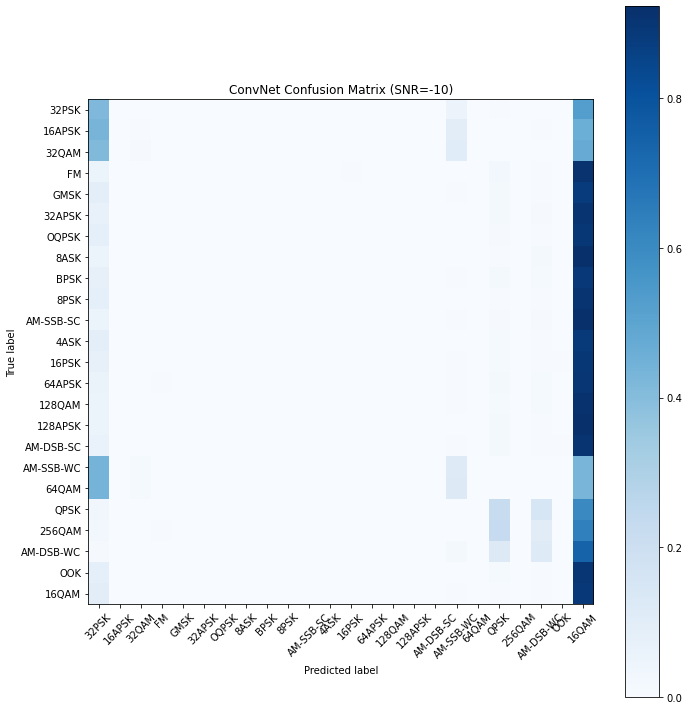

<Figure size 432x288 with 0 Axes>

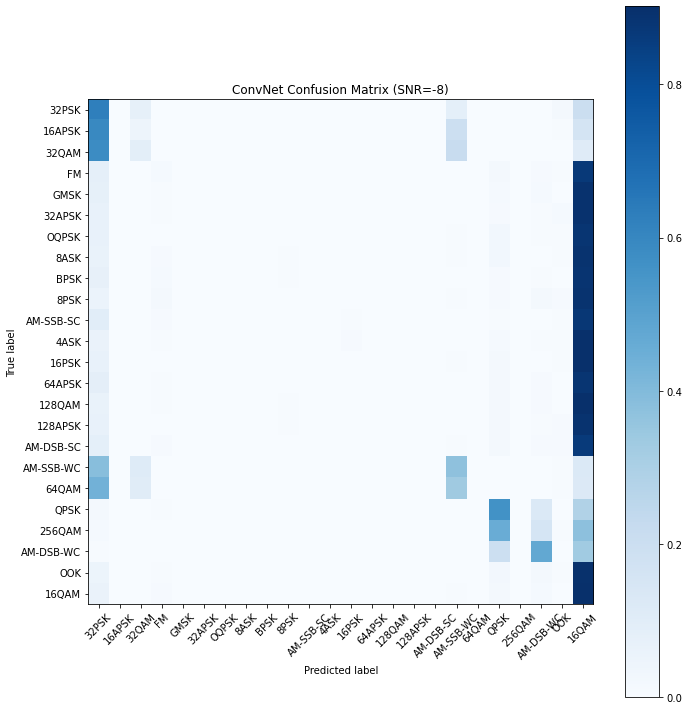

<Figure size 432x288 with 0 Axes>

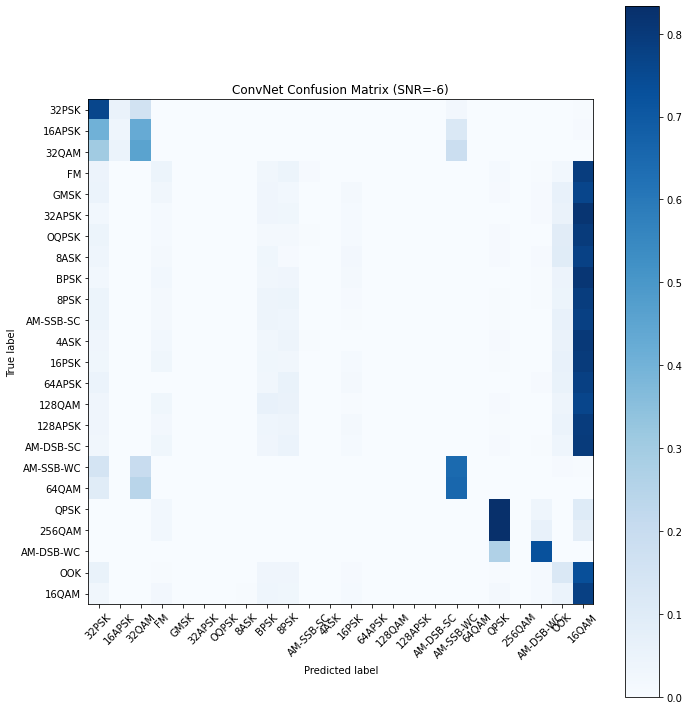

<Figure size 432x288 with 0 Axes>

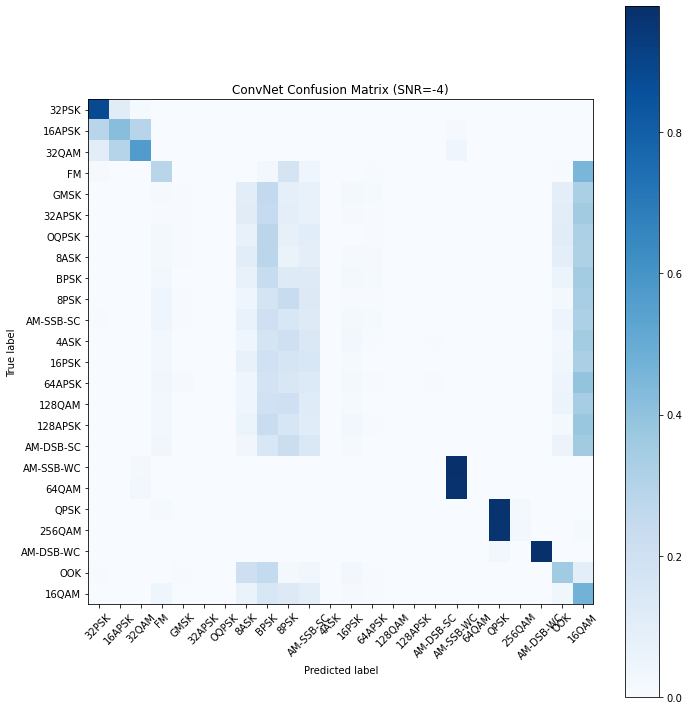

<Figure size 432x288 with 0 Axes>

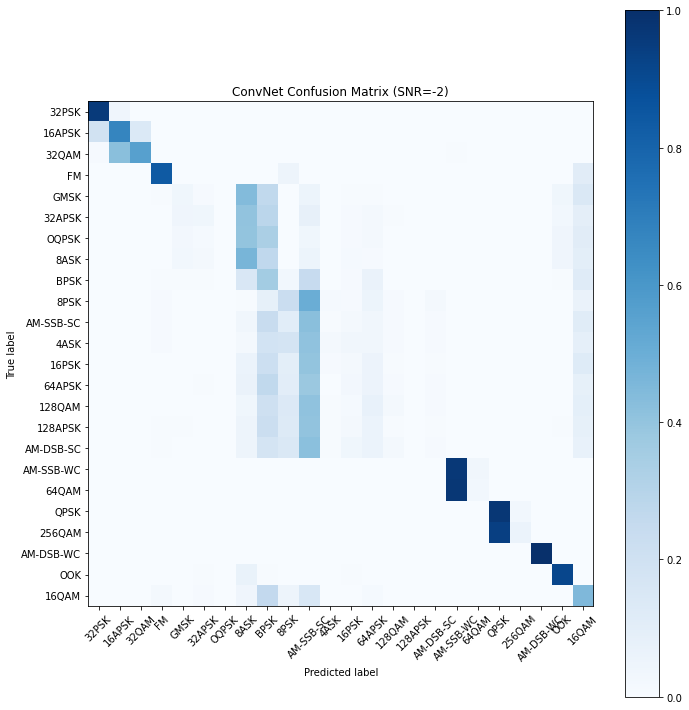

<Figure size 432x288 with 0 Axes>

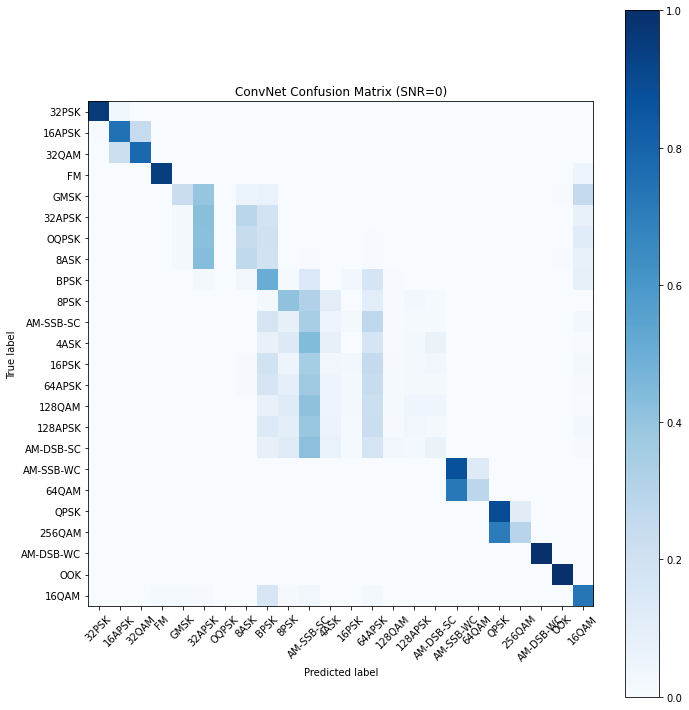

<Figure size 432x288 with 0 Axes>

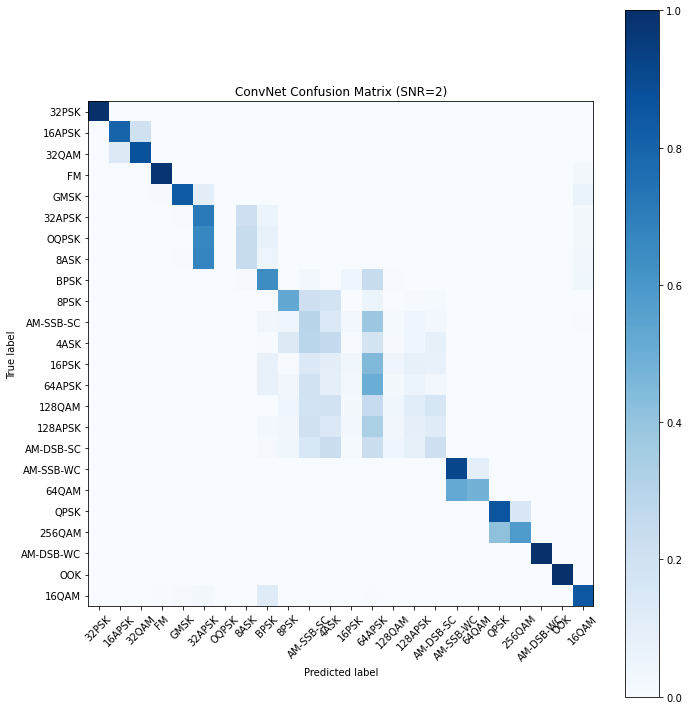

<Figure size 432x288 with 0 Axes>

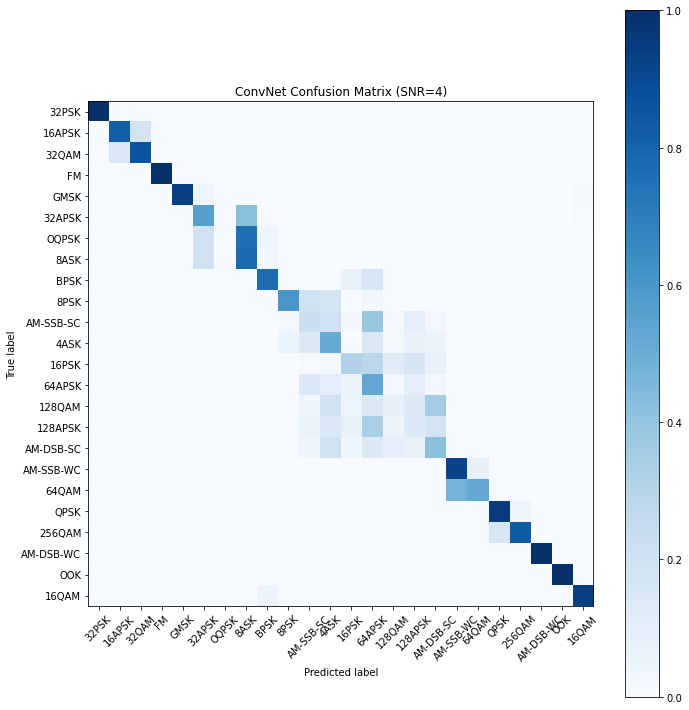

<Figure size 432x288 with 0 Axes>

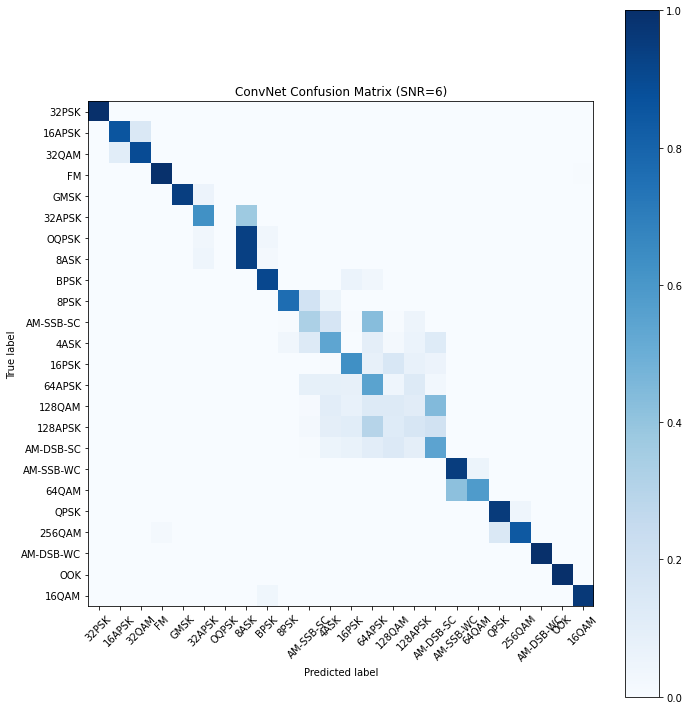

<Figure size 432x288 with 0 Axes>

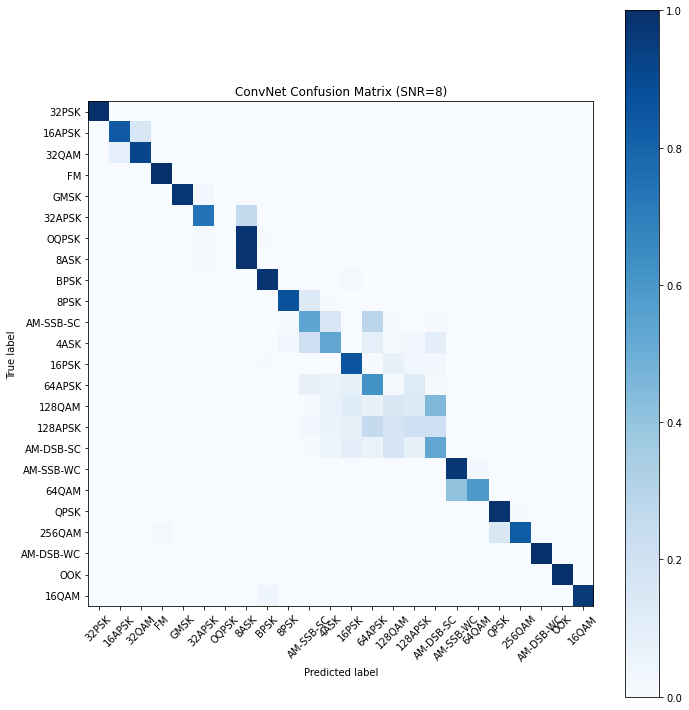

<Figure size 432x288 with 0 Axes>

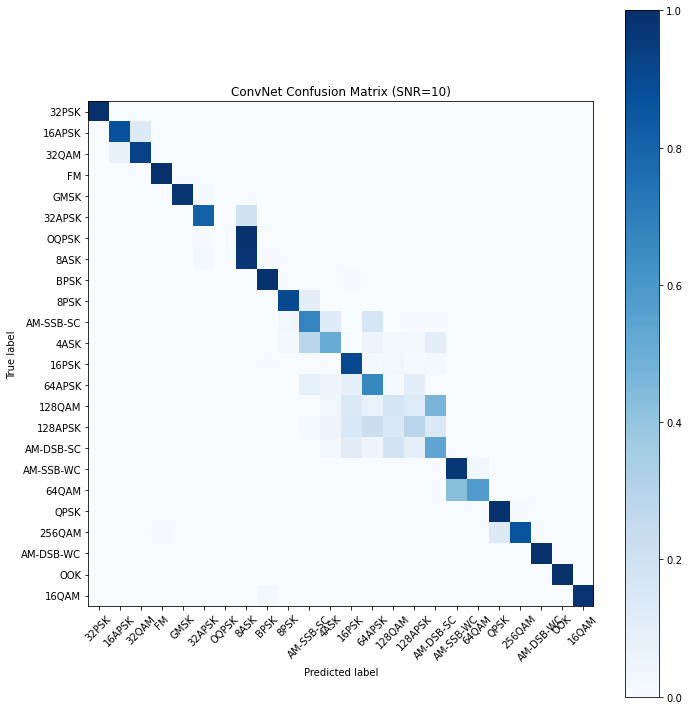

<Figure size 432x288 with 0 Axes>

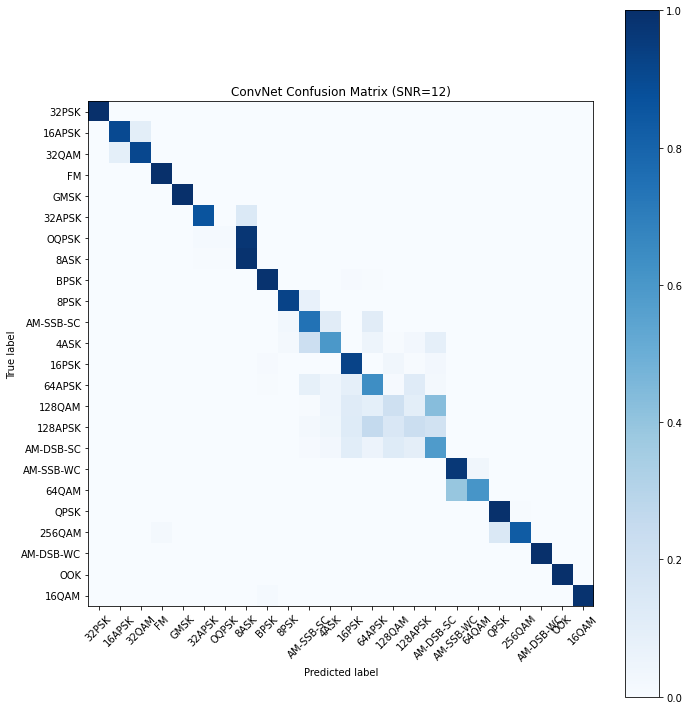

<Figure size 432x288 with 0 Axes>

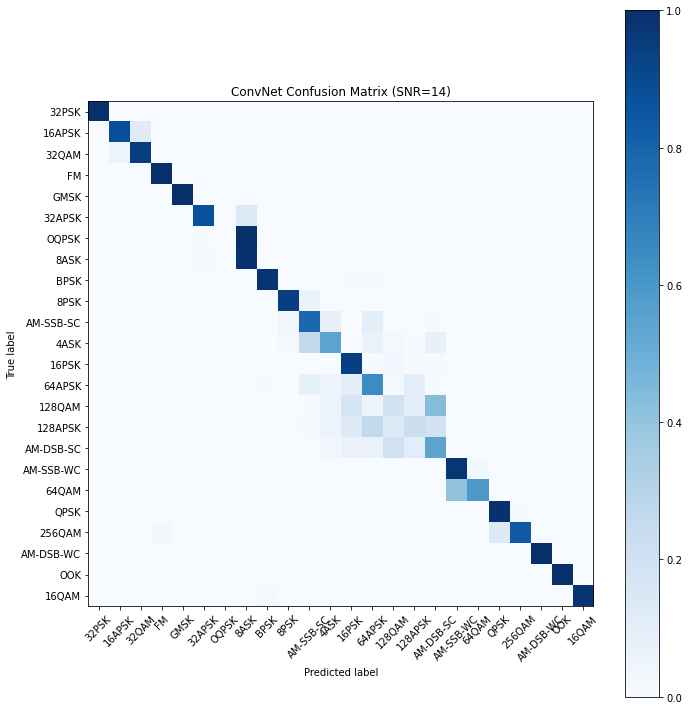

<Figure size 432x288 with 0 Axes>

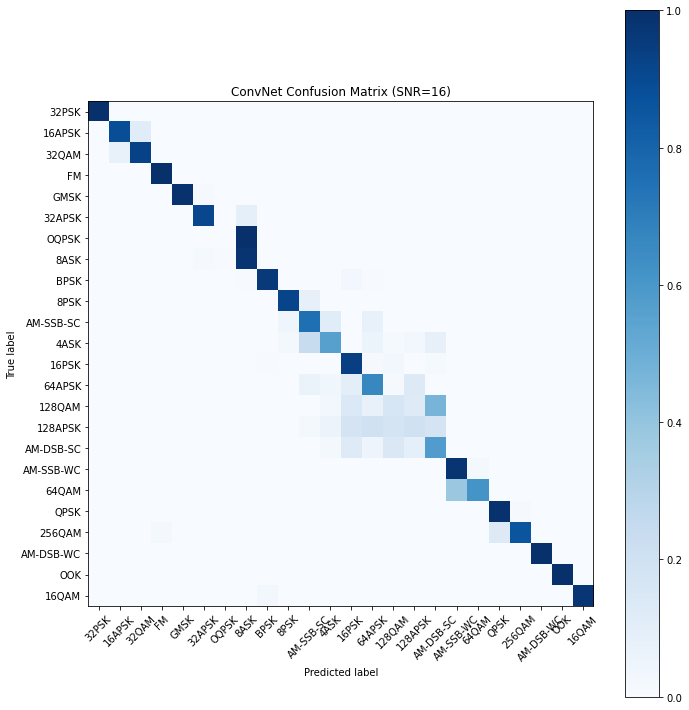

<Figure size 432x288 with 0 Axes>

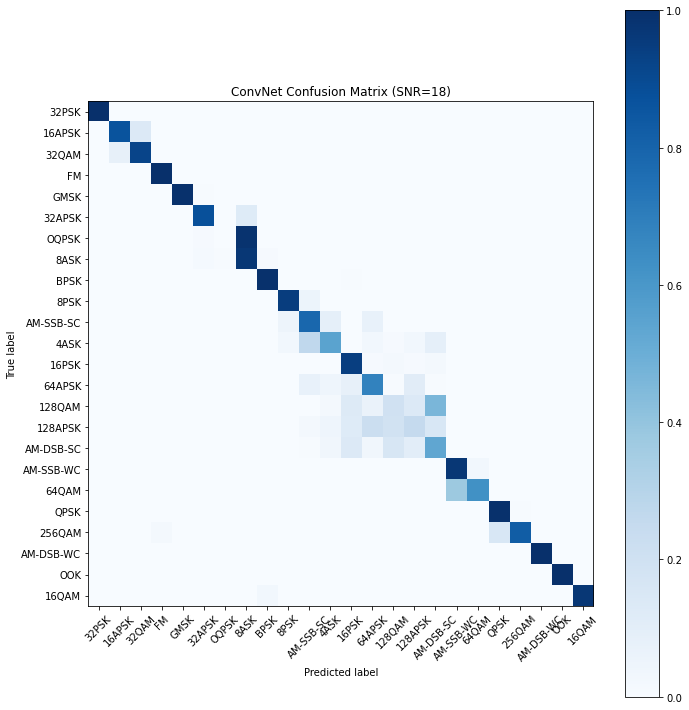

<Figure size 432x288 with 0 Axes>

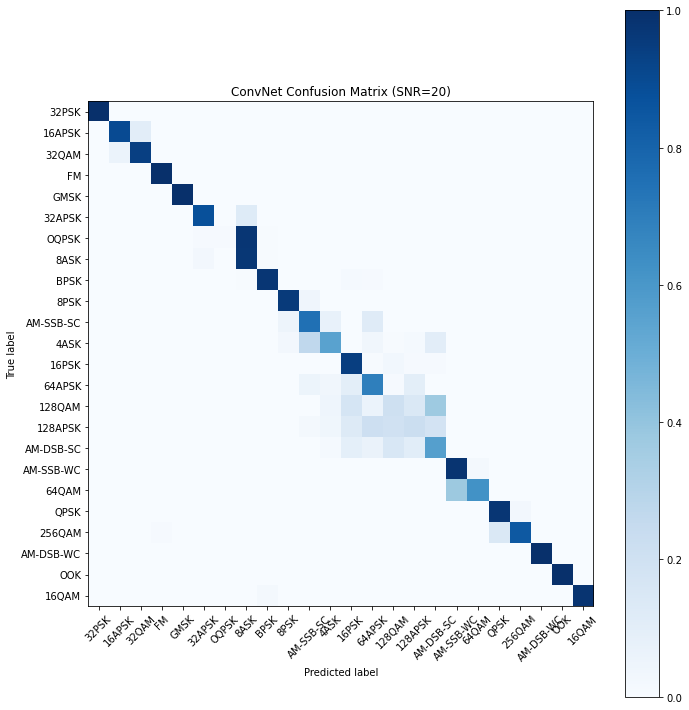

<Figure size 432x288 with 0 Axes>

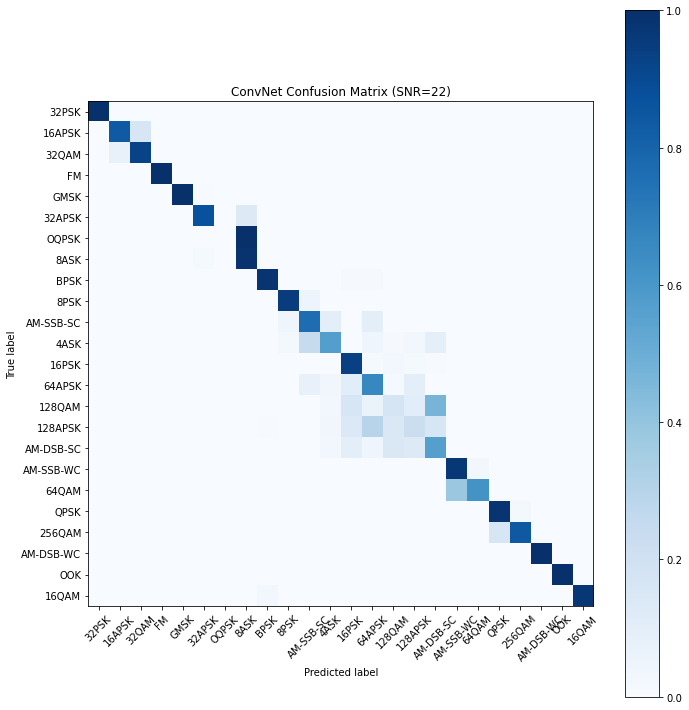

<Figure size 432x288 with 0 Axes>

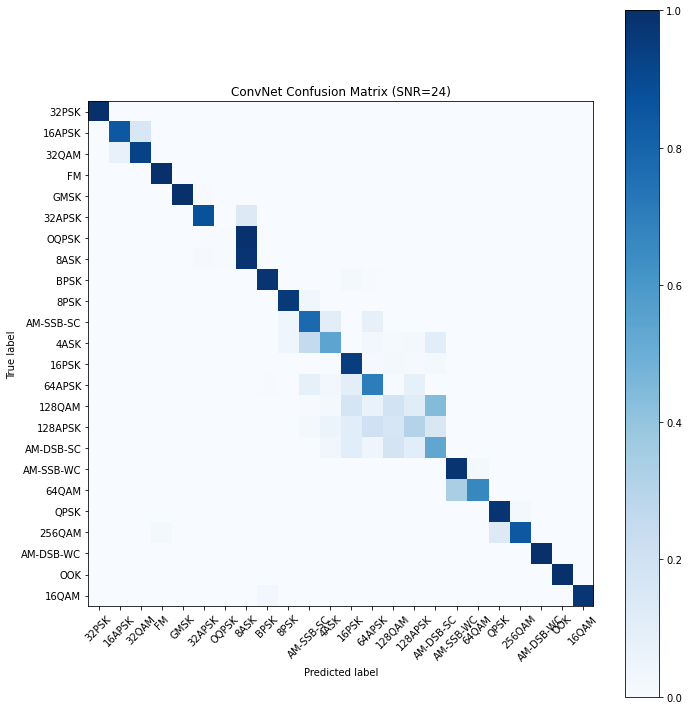

<Figure size 432x288 with 0 Axes>

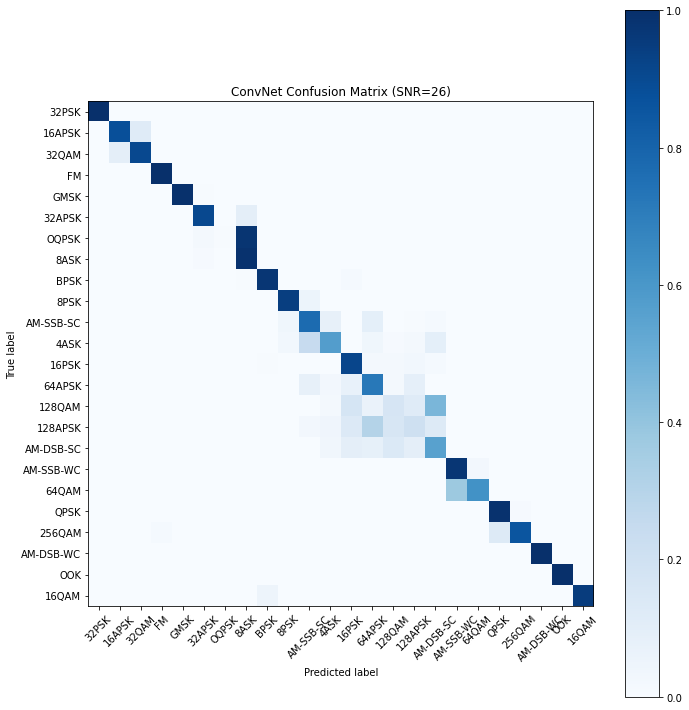

<Figure size 432x288 with 0 Axes>

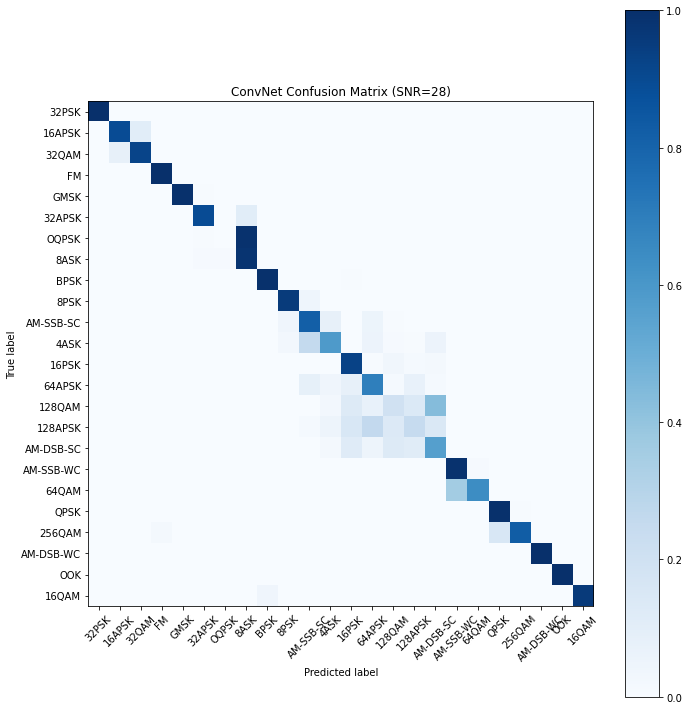

<Figure size 432x288 with 0 Axes>

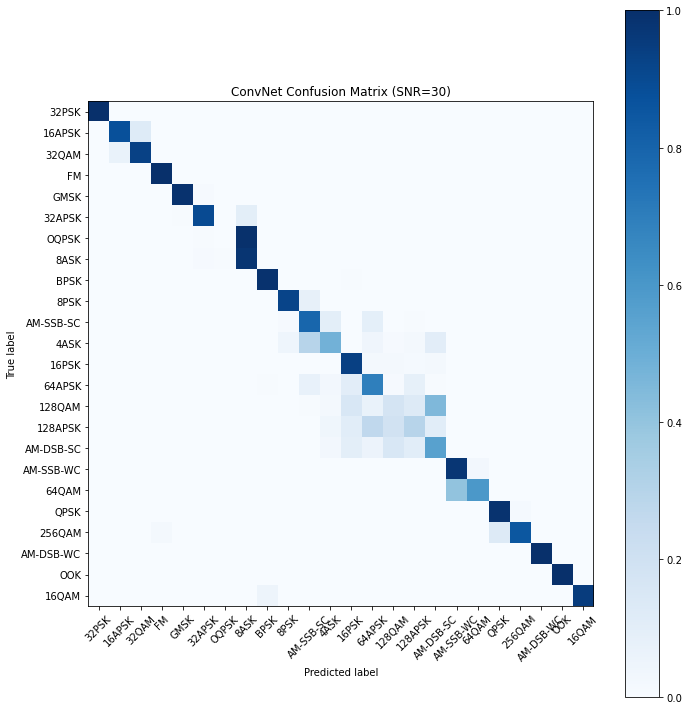

In [20]:

acc={}
Z_test = Z[test_idx]
Z_test = Z_test.reshape((len(Z_test)))
SNRs = np.unique(Z_test)
for snr in SNRs:
    X_test_snr = X_test[Z_test==snr]
    Y_test_snr = Y_test[Z_test==snr]
    
    pre_Y_test = model.predict(X_test_snr)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,X_test_snr.shape[0]):    #该信噪比下测试数据量
        j = list(Y_test_snr[i,:]).index(1)   #正确类别下标
        k = int(np.argmax(pre_Y_test[i,:])) #预测类别下标
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
   
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy %s: "%snr, cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

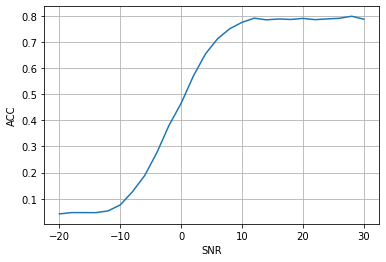

In [21]:

plt.plot(acc.keys(),acc.values())
plt.ylabel('ACC')
plt.xlabel('SNR')
plt.grid(True)
plt.show()

In [22]:
test_idx

[524289,
 2,
 3,
 524290,
 524292,
 1048579,
 7,
 524295,
 9,
 1048584,
 524300,
 1048591,
 1048594,
 20,
 1048596,
 524311,
 1048601,
 26,
 27,
 28,
 524316,
 524319,
 32,
 33,
 1048610,
 35,
 524324,
 1048611,
 38,
 524326,
 40,
 1048613,
 1048617,
 1048619,
 44,
 45,
 46,
 524333,
 48,
 524334,
 524335,
 524336,
 524340,
 53,
 54,
 55,
 524344,
 1048629,
 1048630,
 59,
 60,
 1048635,
 1048636,
 63,
 524352,
 65,
 1048639,
 1048640,
 1048643,
 69,
 70,
 524358,
 524360,
 1048646,
 1048653,
 1048654,
 79,
 524368,
 83,
 87,
 1048663,
 89,
 524377,
 1048665,
 1048667,
 1048669,
 1048670,
 1048671,
 96,
 1048673,
 1048674,
 102,
 103,
 104,
 1048678,
 524394,
 1048684,
 1048685,
 524399,
 524400,
 1048689,
 524403,
 1048693,
 1048694,
 524413,
 1048701,
 1048702,
 128,
 1048703,
 1048709,
 134,
 524422,
 136,
 524423,
 1048711,
 1048716,
 524429,
 142,
 524430,
 524432,
 1048721,
 524434,
 147,
 158,
 524446,
 162,
 524451,
 1048738,
 1048739,
 167,
 524457,
 524462,
 175,
 176,
 104875